In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.io import loadmat

sns.set_style('whitegrid')

In [52]:
A = np.pi
a = 1
n = 600
ts = np.arange(1, 600+1)/120
ft = A * np.cos(2*np.pi * 5*ts + a)
ft = pd.Series(ft, index=ts)

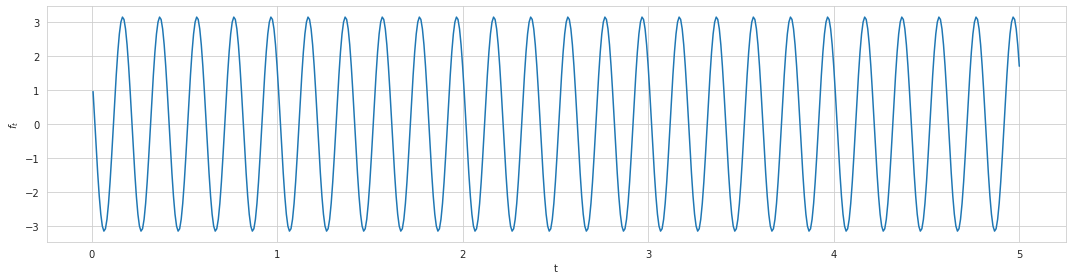

In [53]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(ts, ft)
ax.set_xlabel('t')
ax.set_ylabel('$f_t$')
fig.tight_layout()
fig.show()

In [56]:
ft.iloc[478]

2.3237753526258387

In [57]:
from collections import deque

np.random.seed(2123412)

standard_normals = deque(np.random.normal(loc=0, scale=1, size=n+2))

w0 = standard_normals.popleft()
w1 = standard_normals.popleft()
xs = []
for i in range(n):
    w = standard_normals.popleft()
    x = w + 0.4*w1 + 1.6*w0
    xs.append(x)

    w1 = w
    w0 = w1

xs = pd.Series(xs, index=ts)
ys = pd.Series(xs + ft, index=ts)

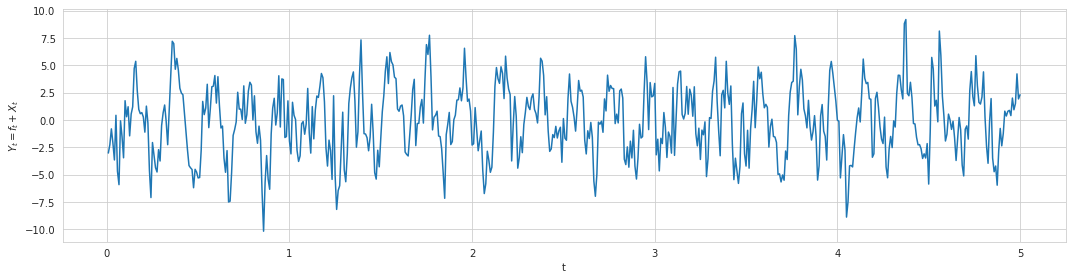

In [58]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(ts, ys)
ax.set_xlabel('t')
ax.set_ylabel('$Y_t = f_t + X_t$')
fig.tight_layout()
fig.show()

In [133]:
arima = sm.tsa.ARIMA(ys, order=(0, 0, 2), trend='n').fit()

/home/ztang484/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ztang484/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ztang484/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [122]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1368.714
Date:                Sat, 18 Feb 2023   AIC                           2743.427
Time:                        22:38:31   BIC                           2756.618
Sample:                             0   HQIC                          2748.562
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7599      0.037     20.514      0.000       0.687       0.832
ma.L2          0.2523      0.040      6.324      0.000       0.174       0.331
sigma2         5.6042      0.310     18.080      0.000       4.997       6.212
===================================================================================
Ljung-Box (L1) (Q):                   1.58   Jarque-Bera (JB):                 2.31
Prob(Q):                              0.21   Prob(JB):                         0.32
Heteroskedasticity (H):               0.93   Skew:                            -0.05
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: >

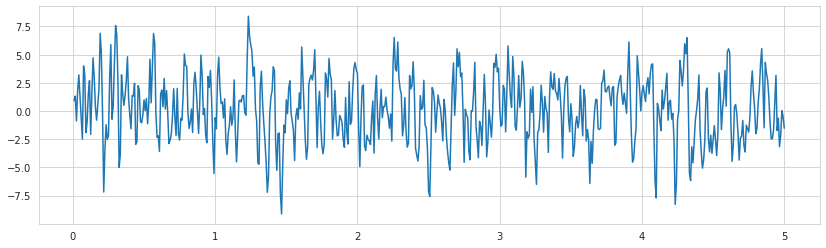

In [126]:
arima.simulate(600).plot(figsize=(14, 4))

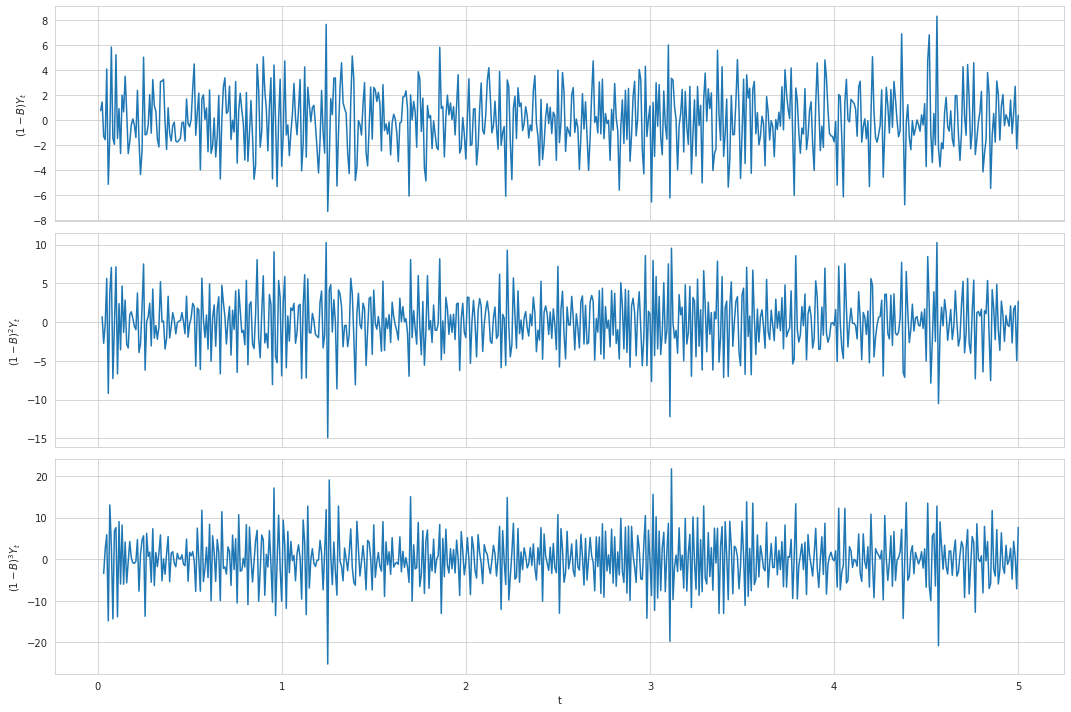

In [139]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10), sharex=True)
ax[0].plot(ys - ys.shift(1))
ax[1].plot(ys - 2*ys.shift(1) + ys.shift(2))
ax[2].plot(ys - 3*ys.shift(1) + 3*ys.shift(2) - ys.shift(3))

ax[0].set_ylabel('$(1-B) Y_t$')
ax[1].set_ylabel('$(1-B)^2 Y_t$')
ax[2].set_ylabel('$(1-B)^3 Y_t$')
ax[2].set_xlabel('t')

fig.tight_layout()
fig.show()